<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_106_Reference_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 106: Polynomial Regression - Cross-Validation

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Polynomial Regression - Overfitting and Bias-Variance Tradeoff|
|||
|**Class Description**|In this class, a student learns to perform cross validation for Air Quality dataset.|
|||
|**Class**|C106|
|||
|**Class Time**|55 minutes|
|||
|**Goal**|Calculate Bias and Variance.|
||Visualise the Linear Regression Model for Air Quality Analysis.|
||Implement Polynomial Regression Model using `Pipeline`.|
||Implement Cross Validation on Polynomial Regression Model.|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Teacher-Student Activities

In the previous class, we learned how using higher
degrees at fitting your data might result in overfitting. We also learned the concept of Bias and Variance and their trade-off.

In this class, you will learn how to estimate bias and variance using Python. Also, we will explore the benefits of using multiple train/test splits for getting an unbiased and a more accurate model.

Let's quickly go through the activities covered in the previous class and begin this class from **Activity 1: Calculating Bias and Variance**.

---

In [ ]:
# Run the code cell
# Visualising the relationship between X and y arrays where 'y = f(X) + noise'

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

# Create the 'X' and 'y' array where y = f(X) + noise.

X = np.arange(0, 5, 0.01)
y = 0.5 * (X**4) + 2 * (X**3) - 4 * (X**2) - X - 50
noise = 50 * np.random.randn(len(X))
y = y + noise

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train_reshaped = X_train.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


---

#### Bias and Variance

Ideally, a model should have following two key characteristics:
1. It should accurately learn the key patterns in the train set.
2. It should be generalised enough to work well on any unseen
data.

Unfortunately, while trying to achieve the first characteristic, the model may **overfit** the train data, leading to the failure in generalising the model. On the other hand, while trying to achieve  generalisation, it may fail to capture the important patterns in data resulting in **underfit**.



Let us plot the predictions for the test set of the above data for degrees `1`, `4`, and `25` and observe the difference. Also calculate and display $R^2$ score and Mean Squared Error (MSE) for each degree.

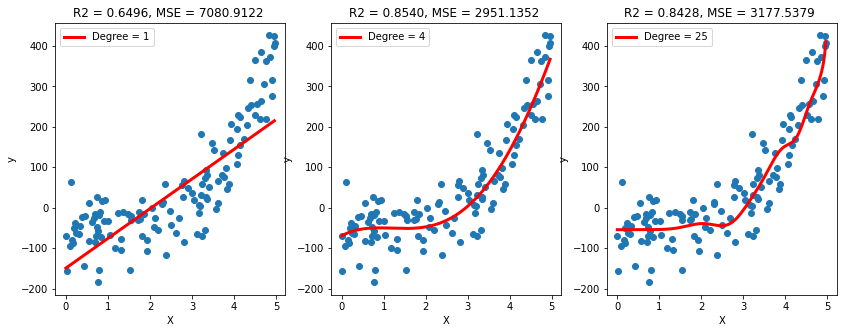

In [ ]:
# Plot predictions for test set for degrees 1, 4 and 25 using subplots.
# Also display R-squared and MSE score for each degree.

degrees = [1, 4, 25]
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)

  poly_features = PolynomialFeatures(degree = degrees[i], include_bias = False)

  X_train_poly = poly_features.fit_transform(X_train_reshaped)
  X_test_poly = poly_features.fit_transform(X_test_reshaped)

  # Fit the linear regression using higher order train set features.
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)

  # Make predictions for test set.
  y_test_predict = poly_model.predict(X_test_poly)

  # Calculate and print R-squared score and MSE for test set.
  r2_test = r2_score(y_test, y_test_predict)
  mse_test = mean_squared_error(y_test, y_test_predict)

  X_test_grid = np.arange(min(X_test), max(X_test), 0.01)
  X_test_grid = X_test_grid.reshape(len(X_test_grid), 1)


  ax.set(title = f"R2 = {r2_test:.4f}, MSE = {mse_test:.4f} ", xlabel = 'X', ylabel = 'y')
  ax.scatter(X_test, y_test)
  ax.plot(X_test_grid, poly_model.predict(poly_features.fit_transform(X_test_grid)),
           label = f"Degree = {degrees[i]}", color = "red", linewidth = 3 )
  ax.legend()

plt.show()




In the above graph, you may observe that for too small a degree (`degree = 1`), the model underfits.
Whereas for too large a degree (`degree = 25`), the model overfits.

**Bias:**
- If model accuracy is low on the train set as well as test set, the model is said to be underfitting or has a **high bias**.
- Bias is how far the model's predictions are from the correct values.
- Thus, bias takes into account the difference between the model prediction and real outcome.
- Thus, from the above graph, we can say that:
  - The `degree = 1` model has highest bias  as the error from the actual data points appears to be high.
  - The `degree = 4` and `degree = 25` model has lower bias as the regression line is pretty close to the actual data points.

**Variance:**
- If a model is giving high accuracy on the train set, but on the test set the accuracy drops, then the model is said to be overfitting or has a **high variance**.
- Variance indicates how much the predictions will alter if different training data were used.
- Thus, from the above graph, we can say that:
  - The `degree = 1` model has lowest variance as the predictions would not **vary** significantly, even if we use a slightly different train set.
  - On the other hand, the `degree = 4` and `degree = 25` models are learning a lot from their training set. So, even if there is a slight change in the training set, these model's predictions will **vary** drastically, thereby showing high variance.

Thus, we can summarize that:
 - Underfitting (`degree = 1`) results in high bias but low variance.
 - Overfitting (`degree = 25`) results in low bias but high variance.

Ideally, we would prefer a model with low bias and low variance. However in practice, we observed that decreasing the bias will increase variance and  decreasing the variance will increase bias.

Hence, we need to find the optimum balance between bias and variance. This relationship between bias and variance is generally referred to as the  **bias-variance trade-off**.

**Total Error:**

The total generalization error of any model is given as:

$$\text{Total Error = Bias}^2 + \text{Variance + Irreducible Error}$$

Where,
the irreducible error is the error that gets introduced due to noise and cannot be avoided.

From the formula, it seems that a good model should balance both bias and variance errors, so the model does not underfit or overfit the data.

Observe the $R^2$ and MSE values of different models in the above graph:

|Degree|$R^2$|MSE|Type of Fit|
|-|-|-|-|
|1|0.6496|7080.9122|Underfit|
|4|0.8540|2951.1352|Best Fit|
|25|0.8428|3177.5379|Overfit|

The degree `4` has the highest $R^2$ value and lowest MSE value.
Thus, by looking at the graph and the values of the performance metrics, we can conclude that the `degree = 4`  is an ideal value for degree of polynomial so as to avoid both overfitting and underfitting conditions.

Now let us put these concepts into practice and calculate bias and variance using Python.


---

#### Activity 1: Calculating Bias and Variance

In a real-life situation in which the test data is unobserved, it is generally not possible to compute the exact bias and variance for the test set. We usually use these concepts only as a means to  select the best model, configure models and/or to interpret results.

Even though the bias-variance trade-off is a conceptual tool, we can still estimate it using the `bias_variance_decomp()` function of  `mlxtend` library.


For that, we must install and upgrade the `mlxtend` library using `! pip install mlxtend --upgrade`.

In [ ]:
# S1.1: Install and upgrade 'mlxtend' library.
! pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Next, import `bias_variance_decomp` function from `mlxtend.evaluate` module. This function returns the estimated error of the model as well as the estimated bias and variance errors.

Call the `help()` function for `bias_variance_decomp` to understand how it works.


In [ ]:
# S1.2: Import 'bias_variance_decomp' and call the help() function to understand its functionality.
from mlxtend.evaluate import bias_variance_decomp

help(bias_variance_decomp)

Help on function bias_variance_decomp in module mlxtend.evaluate.bias_variance_decomp:

bias_variance_decomp(estimator, X_train, y_train, X_test, y_test, loss='0-1_loss', num_rounds=200, random_seed=None, **fit_params)
    estimator : object
        A classifier or regressor object or class implementing both a
        `fit` and `predict` method similar to the scikit-learn API.
    
    X_train : array-like, shape=(num_examples, num_features)
        A training dataset for drawing the bootstrap samples to carry
        out the bias-variance decomposition.
    
    y_train : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associated with the `X_train` examples.
    
    X_test : array-like, shape=(num_examples, num_features)
        The test dataset for computing the average loss, bias,
        and variance.
    
    y_test : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regres

Let us first simply calculate the bias and variance for the second degree polynomial model for the test set.

**Note:** You need not call the `fit()` and `predict()` function on `LinearRegression` object as the `bias_variance_decomp()` function will do that implicitly.

In [ ]:
# S1.3: Calculate bias and variance for second degree polynomial model.

# Transform train and test set features into second degree polynomial feature.
poly_2 = PolynomialFeatures(degree = 2, include_bias = False)

X_train_poly_2 = poly_2.fit_transform(X_train_reshaped)
X_test_poly_2 = poly_2.fit_transform(X_test_reshaped)


# Create the LinearRegression object
poly_model_2 = LinearRegression()

# Pass LinearRegression object, transformed train and test set features, target variable as input to  'bias_variance_decomp()' function.
# Also pass any 'random_seed' and 'num_rounds' values as input to  'bias_variance_decomp()' function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(poly_model_2, X_train_poly_2, y_train, X_test_poly_2, y_test, loss='mse',
                                                            random_seed=123, num_rounds = 200)

# Display the Average Loss, Bias and Variance returned by 'bias_variance_decomp()' function.
print(f'Average Expected Loss: {avg_expected_loss:.4f}')
print(f'Average Bias:  {avg_bias:.4f}')
print(f'Average Variance:  {avg_var:.4f}')

Average Expected Loss: 3337.6497
Average Bias:  3312.1658
Average Variance:  25.4839


In the above code, the `bias_variance_decomp()` function will run for 200 rounds (`num_rounds = 200`) before calculating the average bias and variance values. We can also see that the sum of the average bias and variance nearly equals the average expected loss of the model.

Let us now calculate bias and variance errors for degrees `1` to `30` and plot them to observe their relationship with varying degrees.

<Figure size 1008x360 with 0 Axes>

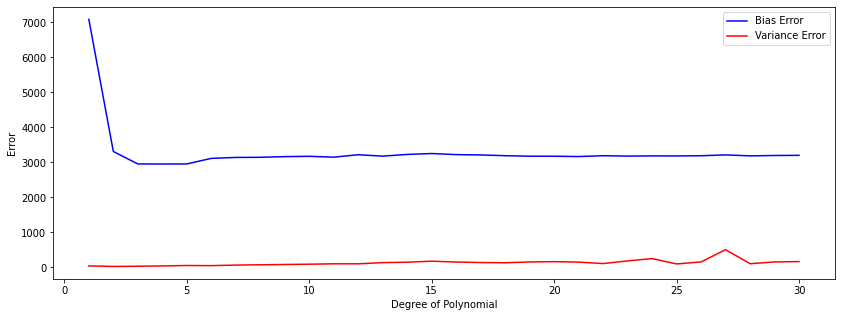

In [ ]:
# S1.4: Calculate bias and variance for degree 1 - 30.

# Create two empty lists, bias_list and var_list
bias_list =[]
var_list = []

degrees = np.arange(1, 31)

plt.figure(figsize=(14, 5))

# Apply 'bias_variance_decomp()' function on degrees 1-30.
# Append the obtained bias and variance at each degree in 'bias_list' and 'var_list'.
for degree in degrees:

  poly_features = PolynomialFeatures(degree = degree, include_bias = False)

  X_train_poly = poly_features.fit_transform(X_train_reshaped)
  X_test_poly = poly_features.fit_transform(X_test_reshaped)

  # Fit the linear regression using high order train set features.
  poly_model = LinearRegression()

  avg_error, bias, var = bias_variance_decomp(poly_model, X_train_poly, y_train, X_test_poly, y_test, loss='mse')
  bias_list.append(bias)
  var_list.append(var)

# Plot the 'bias_list' and 'var_list' for each degree.
plt.figure(figsize=(14, 5))
plt.plot(np.arange(1, 31), bias_list, color ='b', label = f"Bias Error")
plt.plot(np.arange(1, 31), var_list, color ='r', label = f"Variance Error")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Error")
plt.legend()
plt.show()


From the above graph, you may observe that low degree polynomial models has high bias and low variance (underfitting), whereas higher degree polynomial models has low bias and high variance (overfitting).

Hence, a good model must balance between bias error and variance error to avoid underfitting and overfitting.



Let us now implement polynomial regression on air quality dataset that we had already explored in few of the previous lessons and compare it with the linear regression model.

---

#### Activity 2: Air Quality Analysis - `PT08.S3(NOx)` and `PT08.S5(O3)`

Run the codes covered in the previous classes which performs various data cleaning and preprocessing operations on Air Quality Dataset. Also, observe the pair plots obtained.

In [ ]:
# Run the code cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1)

# Dropping the null values.
df = df.dropna()

# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median()
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Group the DataFrames about the 'Month' column.
group_2004_month = aq_2004_df.groupby(by='Month')
group_2005_month = aq_2005_df.groupby(by='Month')

# Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df = pd.concat([aq_2004_df, aq_2005_df])

# Information of the DataFrame.
df.info()

# Create the scatter plots for the numeric columns of the 'df' DataFrame in one go.
sns.pairplot(df.iloc[:, 1:-4])
plt.show()

The pairplot above shows that there are several columns with linear as
well as non-linear relation like:

- `PT08.S3(NOx)` and `PT08.S5(O3)` columns
- `PT08.S3(NOx)` and `PT08.S4(NO2)` columns
- `C6H6(GT)` and `PT08.S5(O3)` columns
- And several others

Let's consider the relationship between `PT08.S3(NOx)` and `PT08.S5(O3)` columns. Let's create a separate scatter plot to observe this relationship.





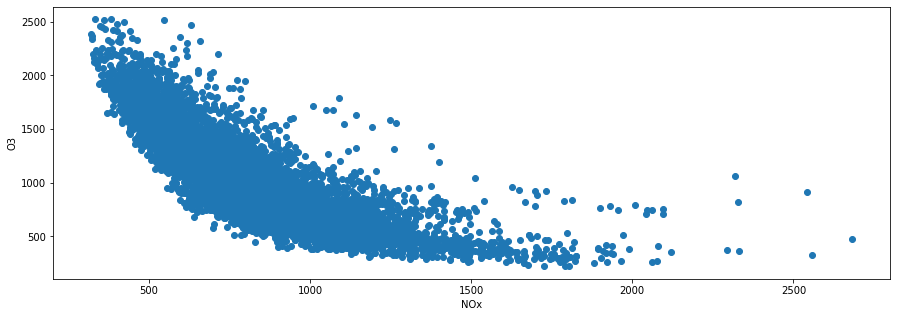

In [ ]:
# S2.1: Create a scatter plot for relationship between 'PT08.S3(NOx)' and 'PT08.S5(O3)'.
plt.figure(figsize=(15, 5))
plt.scatter(df['PT08.S3(NOx)'], df['PT08.S5(O3)'])
plt.xlabel('NOx')
plt.ylabel('O3')
plt.show()

As we can observe, the relationship between the `PT08.S3(NOx)` and `PT08.S5(O3)` columns does not seems to be linear.

Let's create a linear regression model with `PT08.S3(NOx)` column as feature variable and `PT08.S5(O3)` as target and perform predictions for both train and test sets.

The R-squared score for train set is 0.6292
The R-squared score for test set 0.6372


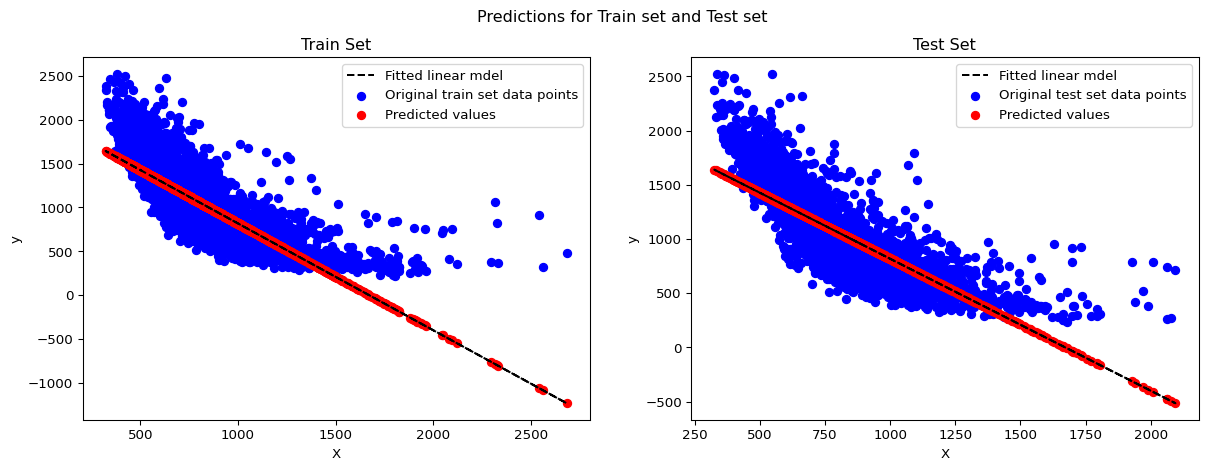

In [ ]:
# S2.2: Create and deploy the Linear Regression model.
# Plot the predicted values and actual values for train and test set.
X = df['PT08.S3(NOx)']
y = df['PT08.S5(O3)']

# Splitting the DataFrame into the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Build linear regression model using the 'sklearn.linear_model' module.
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train_reshaped, y_train)

# Make Predictions for the train set.
y_train_predict = sklearn_lin_reg.predict(X_train_reshaped)
y_test_predict = sklearn_lin_reg.predict(X_test_reshaped)

# Evaluate the model accuracy with R-square metrics.
print(f"The R-squared score for train set is {r2_score(y_train, y_train_predict):.4f}")
print(f"The R-squared score for test set {r2_score(y_test, y_test_predict):.4f}")

# plot train and test set predictions using subplots
fig, (ax1, ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5), dpi = 96)

ax1.set(title = 'Train Set', xlabel = 'X', ylabel = 'y')
ax1.scatter(X_train, y_train, label = f"Original train set data points", color = "b")
ax1.plot(X_train, y_train_predict, label = f"Fitted linear mdel", color = "black", linestyle = '--')
ax1.scatter(X_train, y_train_predict , label = f"Predicted values", color = "r")
ax1.legend()

ax2.set(title = 'Test Set', xlabel = 'X', ylabel = 'y')
ax2.scatter(X_test, y_test, label = f"Original test set data points", color = "b")
ax2.plot(X_test, y_test_predict, label = f"Fitted linear mdel", color = "black", linestyle = '--')
ax2.scatter(X_test, y_test_predict , label = f"Predicted values", color = "r")
ax2.legend()

fig.suptitle('Predictions for Train set and Test set')
plt.show()

The output above clearly indicates that the linear regression model is not able to fit both train and test data properly as the line is not capturing the relationship between feature and target arrays.

Also, the  $R^2$  scores for both train and test features are low. It is a clear case of underfitting.

Let us now implement Polynomial Regression of degree `2` on this dataset and determine whether we can obtain a more accurate model.

---

#### Activity 3: Polynomial Regression using Pipeline

Recall the steps of training a polynomial regression model covered in the previous lesson:
```python
poly_features = PolynomialFeatures(degree = desired_degree, include_bias = False)

# Polynomial transformation of original features
X_train_poly = poly_features.fit_transform(X_train_reshaped)
X_test_poly = poly_features.fit_transform(X_test_reshaped)

# Linear regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
```

Hence, a polynomial model implements following two estimators one after another:
1. `PolynomialFeatures()`: For higher degree polynomial transformation of original features.
2. `LinearRegression()`:  For creating linear regression object.

This makes the code a bit complex and bulky as unnecessary variables are created. You can use the `Pipeline` object to encapsulate these two estimators into a single estimator.


The `Pipeline` class of `sklearn.pipeline` module allows stacking  multiple processes into a single estimator.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/1212654b-82c3-4b2e-9ad0-b58386153fd4.PNG"/></center>


Thus, the polynomial transformation and linear regression will be performed by a single estimator called the `Pipeline` class. The `Pipeline` class has `fit()`, `predict()`, and `score()` functions just like any other estimator (for example, `LinearRegression`).

The syntax for `Pipeline` class is as follows:
```python
pipeline = Pipeline([
    ('first', first_function(some inputs)),
    ('next', next_function())
])
```
The `Pipeline` constructor accepts a tuple list. Each tuple contains following two elements:
 1. A descriptive name of the estimator model.
 2. The model constructor.

In our case, we need two model constructors that must be used one after another:
1. `PolynomialFeatures()`
2. `LinearRegression()`

Thus, the input to the `Pipeline` constructor would be:

```python
pipeline = Pipeline([
    ('polynomial',  PolynomialFeatures(degree = desired_degree, include_bias = True|False)),
    ('linear', LinearRegression())
])
```
In the above code, the `'polynomial'` and `'linear'` are just names given to their respective constructors.

Let us now import `Pipeline` class of `sklearn.pipeline` module. You may also call the `help()` function for `Pipeline` to learn more about it.
  

In [ ]:
# S3.1: Import 'Pipeline' and call the help() function to understand its functionality.
from sklearn.pipeline import Pipeline
help(Pipeline)

Help on class Pipeline in module sklearn.pipeline:

class Pipeline(sklearn.utils.metaestimators._BaseComposition)
 |  Pipeline(steps, memory=None, verbose=False)
 |  
 |  Pipeline of transforms with a final estimator.
 |  
 |  Sequentially apply a list of transforms and a final estimator.
 |  Intermediate steps of the pipeline must be 'transforms', that is, they
 |  must implement fit and transform methods.
 |  The final estimator only needs to implement fit.
 |  The transformers in the pipeline can be cached using ``memory`` argument.
 |  
 |  The purpose of the pipeline is to assemble several steps that can be
 |  cross-validated together while setting different parameters.
 |  For this, it enables setting parameters of the various steps using their
 |  names and the parameter name separated by a '__', as in the example below.
 |  A step's estimator may be replaced entirely by setting the parameter
 |  with its name to another estimator, or a transformer removed by setting
 |  it to 

Let us now implement polynomial regression model by transforming features to a second degree polynomial feature using the steps given below:

1. Create a tuple list `input` which contains tuples of estimators to be passed as input to `Pipeline` constructor as follows:
```python
input = [('polynomial', PolynomialFeatures(degree = 2, include_bias = False)),
          ('linear', LinearRegression())]`
```

2. Pass `input` list as input to the `Pipeline` constructor. This will return an estimator object. Let's call this estimator object as `pipeline_model`.

3. Call `fit()` function on `pipeline_model` object and pass the original train set as input to the `fit()` function.

4. Perform predictions for train and test sets by calling `predict()` function on `pipeline_model` object.

5. Calculate and print the $R^2$ score for both train and test set.

6. Plot the predicted values for the train and test set within one figure using the `subplot()` function.

R-squared score of training set for degree 2: 0.7457
R-squared score of test set for degree 2: 0.7467


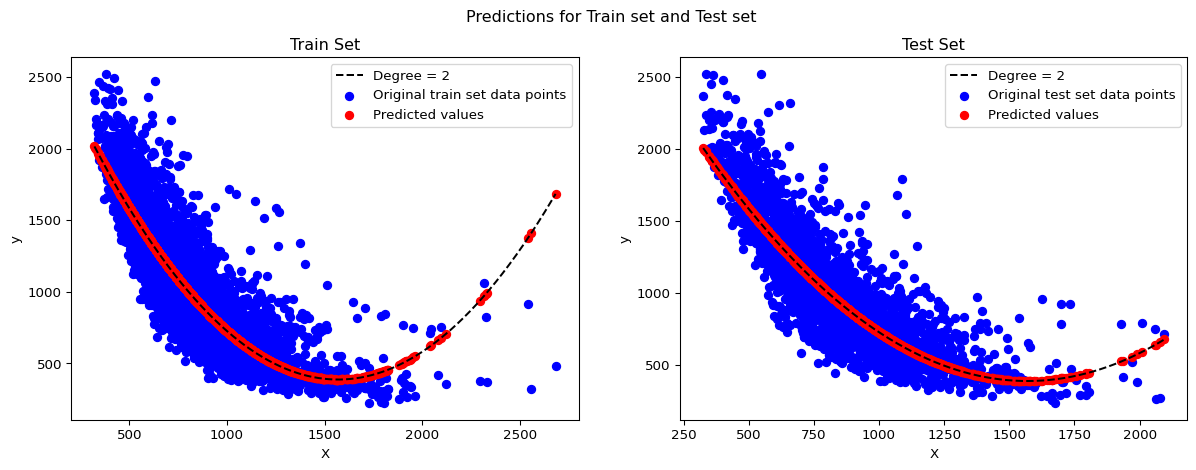

In [ ]:
# S3.2: Train polynomial regression using 'Pipeline' for degree '2'.
# Predict the values for the transformed features and plot the predicted values.

input = [('polynomial', PolynomialFeatures(degree = 2, include_bias = False)),
          ('linear', LinearRegression())]

# Create 'Pipeline' object and train the model using this object.
pipeline_model = Pipeline(input)
pipeline_model.fit(X_train_reshaped, y_train)

# Make Predictions for the train and test set.
y_train_predict = pipeline_model.predict(X_train_reshaped)
y_test_predict = pipeline_model.predict(X_test_reshaped)

# Evaluate the model accuracy with R-square metrics.
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

print(f"R-squared score of training set for degree 2: {r2_train:.4f}")
print(f"R-squared score of test set for degree 2: {r2_test:.4f}")

# plot the predictions for train and test set using subplots.
X_train_grid = np.arange(min(X_train), max(X_train), 0.1)
X_train_grid = X_train_grid.reshape(len(X_train_grid), 1)

X_test_grid = np.arange(min(X_test), max(X_test), 0.1)
X_test_grid = X_test_grid.reshape(len(X_test_grid), 1)


fig, (ax1, ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5), dpi = 96)

ax1.set(title = 'Train Set', xlabel = 'X', ylabel = 'y')
ax1.scatter(X_train, y_train, label = f"Original train set data points", color = "b")
ax1.plot(X_train_grid, pipeline_model.predict(X_train_grid),
           label = f"Degree = 2", color = "black" , linestyle = '--'
           )
ax1.scatter(X_train, y_train_predict , label = f"Predicted values", color = "r")
ax1.legend()

ax2.set(title = 'Test Set', xlabel = 'X', ylabel = 'y')
ax2.scatter(X_test, y_test, label = f"Original test set data points", color = "b")
ax2.plot(X_test_grid, pipeline_model.predict(X_test_grid),
           label = f"Degree = 2", color = "black" , linestyle = '--'
           )
ax2.scatter(X_test, y_test_predict , label = f"Predicted values", color = "r")
ax2.legend()

fig.suptitle('Predictions for Train set and Test set')
plt.show()


You may notice that we obtained a more accurate model for second degree polynomial, as the  $R^2$  score is better than the linear model for both train and test sets.



---

#### Activity 4: Cross Validation

So far, while building a polynomial regression model, we splitted our dataset into training and test sets. This is the classic approach which we usually adopt for building many machine learning models.

However, the results obtained from a single random train/test split cannot be trusted as the test set accuracy can change a lot depending on which observation happen to be in the test set. Thus, to obtain a more reliable, robust, and trustworthy model, it is better to use multiple train/test splits. This is where cross validation comes in.


Recall the **K fold cross validation** already explored in one of the previous lesson. (*Lesson: Detect Credit Card Defaulters - Decision Tree III*)

**K fold cross validation:**

> In `k fold cross validation` the dataset is randomly splitted into into $k$ (subsets) `folds`. For each fold in the dataset:

  - Build the model on $k-1$ folds and $k^{th}$ fold is served as test dataset.

- This process is repeated $k$ times until each of the `k folds` as test dataset.

- The average of the $k$ recorded accuracy is termed as `cross-validation` accuracy and serves as a performance evaluation metric for the model.

> For eg. a **5 fold cross validation** dataset can be viewed as:

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/5foldcv.png" height=500>

> - K fold cross validation technique ensures that every datapoint appears in both train set and test set.


**The `cross_val_score()` function:**

The simplest way to perform k-fold cross validation is to use `cross_val_score()` function of the `sklearn.model_selection` module.

We can see the details of this function using the `help()` function of Python.

In [ ]:
# S4.1: Import the 'cross_val_score()' function

from sklearn.model_selection import cross_val_score

help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`
        instance (e.g., :class:`GroupKFold`).
    
    scoring : string, callable or 

Let us split the the original dataset i.e `X` and `y` using k-fold cross validation for a polynomial regression degree `2` model.

**Note:** You need not use the `fit()` function to train your estimator. The `cross_val_score()` function internally fits the estimator object using `k` train/test splits.

In [ ]:
# S4.2: Apply k fold cross validation on 'X' and 'y' for degree 2 polynomial model.

X_reshaped = X.values.reshape(-1, 1)

input = [('polynomial', PolynomialFeatures(degree = 2, include_bias = False)),
          ('linear', LinearRegression())]

# Create 'Pipeline' object
pipeline_cv = Pipeline(input)

scores = cross_val_score(pipeline_cv, X_reshaped, y)

print(scores)

[0.50462628 0.72101869 0.76274367 0.74726699 0.75799538]


By default, `cross_val_score()` function performs five-fold cross-validation, returning five
accuracy values.

Thus in the above code cell, the `cross_val_score()` function performs the following tasks:
1. Splits the dataset (`X` and `y`) into `k = 5` equal partitions (or "folds")
2. Trains the polynomial regression model on union of folds 2 to 5 (training set).
3. Tests the model on fold 1 (testing set) and calculates testing accuracy.
4. Trains the polynomial regression model on union of fold 1 and fold 3 to 5 (training set).
5. Tests the model on fold 2 (testing set) and calculates testing accuracy.

It will do this 3 more times. Thus, every fold will get a chance to become the test set. When finished, it will return the 5 testing accuracy scores as a numpy array.


Also, we can change the number of folds used by changing the `cv` parameter:

In [ ]:
# S4.3: Apply 10 fold cross validation on the 'Pipeline' object created in the above code cell.
scores_ten_fold = cross_val_score(pipeline_cv, X_reshaped, y, cv = 10)

print(scores_ten_fold)

[0.38492697 0.7422097  0.80629172 0.64462167 0.55406711 0.87195092
 0.75725927 0.73838622 0.83051526 0.67806979]


Looking at all 10 scores produced by the 10-fold
cross-validation, we can also conclude that there is a relatively high variance in the
accuracy between folds, ranging from 38% accuracy to 87% accuracy. This could imply that the model is very dependent on the particular folds used for training.

A common way to summarize the cross-validation accuracy is to compute the mean:

In [ ]:
# S4.4: Print average cross validation scores of 10 folds.
print("Average cross-validation score: {:.2f}".format(scores_ten_fold.mean()))


Average cross-validation score: 0.70


Let us now find the optimal value of degree for our Air quality polynomial regression model using 10 fold cross validation.

**Steps:**
1. Initialise two variables `best_score` and `best_degree` to store the highest cross validation score and the degree at which this score is obtained respectively.
2. Create an empty list `cv_list` to store the mean accuracy value obtained at each `degree` of polynomial regression.
3. Initiate a `for` loop which iterates from `1` to `30`, as we need to apply polynomial regression for degrees `1` to `30`.
4. Create a `Pipeline` object to apply  `PolynomialFeatures` for the current `degree` and `LinearRegression`.
5. Use `cross_val_score()` function to apply 10 fold cross validation on the `Pipeline` object. This will return 10 accuracy scores. Append the mean value of these accuracy scores to the `cv_list` list.
6. Check whether the maximum value out of these 10 accuracy scores is greater than the `best_score` value. If yes, then store this value in `best_score` variable and the current degree in `best_degree` variable.

7. Outside the `for` loop, create a line plot with degrees from `1` to `30` on $x$-axis and `cv_list` on $y$-axis.
8. Also print the best cross validation score and the degree at which this score is obtained by printing the values of `best_score` and `best_degree` variables.

Best cross validation score:0.88
Degree at which cross validation score is highest: 6


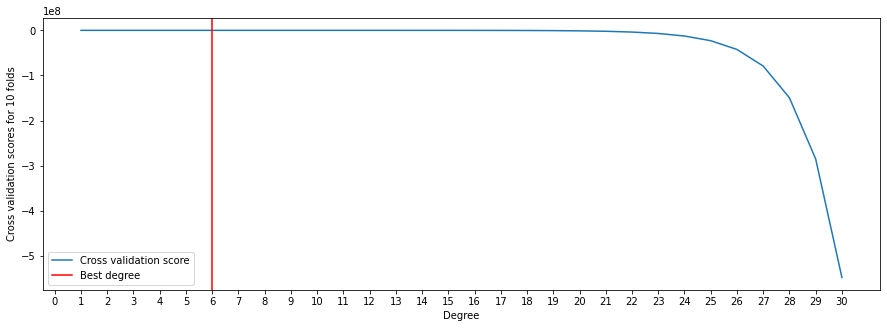

In [ ]:
# S4.5: Perform cross validation on the Polynomial regression model

best_score = 0
best_degree = 0
cv_list = []
for degree in range(1, 31):
# Apply polynomial regression for degrees 1 to 30
  input = [('polynomial', PolynomialFeatures(degree = degree, include_bias = False)),
          ('linear', LinearRegression())]

# Create 'Pipeline' object. Apply 10 fold cross validation and store the accuracy scores for each fold.
  pipeline_model = Pipeline(input)
  scores = cross_val_score(pipeline_model, X_reshaped, y, cv= 10)
  # Append the mean accuracy score to the list.
  cv_list.append(scores.mean())
  # If maximum accuracy score > 'best_score', then store this score in 'best_score' and degree in 'best_degree'.
  if max(scores) > best_score:
    best_score = max(scores)
    best_degree = degree



# Plot the cross validation scores with varying degrees using line plot.
plt.figure(figsize = (15,5))
plt.plot(range(1, 31), cv_list, label='Cross validation score')
plt.axvline(x = best_degree, color = 'r', label = "Best degree ")
plt.xlabel("Degree")
plt.xticks(np.arange(0, 31, 1))
plt.ylabel("Cross validation scores for 10 folds")
plt.legend()
print(f"Best cross validation score:{best_score:.2f}")
print("Degree at which cross validation score is highest:",best_degree)

You may notice that the best cross validation accuracy is obtained at degree `6`. Thus, we obtained our best fit model at degree `6`.

We will stop here. In the next class, we will start working with another category of machine learning algorithms called unsupervised learning.

---

#### Activities

**Teacher Activities:**

1. Polynomial Regression - Cross Validation (Class Copy)

  Link on Panel
    
2. Polynomial Regression - Cross Validation (Reference)

  Link on Panel

  

   


----